In [12]:
!pip install wordcloud 
!pip install imblearn 
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler  
from imblearn.over_sampling import SMOTE 
from wordcloud import WordCloud 

## Load Data


In [2]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
(df.isnull().sum() / len(df))*100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [5]:
#function to count outliers using IQR
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    return ((data < lower_bound) | data > upper_bound).sum()

#Count outliers in each numerical coloumn
outliers_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    outliers_counts[col] = count_outliers_iqr(df[col])

#Convert the results into a DataFrame for easier viewing 
outliers_counts_df = pd.DataFrame(list(outliers_counts.items()),
                                  columns = [['columns', 'Outlier count']])

#display the outlier count DataFrame
outliers_counts_df

,columns,Outlier count
0,Pregnancies,768
1,Glucose,0
2,BloodPressure,0
3,SkinThickness,768
4,Insulin,768
5,BMI,0
6,DiabetesPedigreeFunction,691
7,Age,0
8,Outcome,768


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

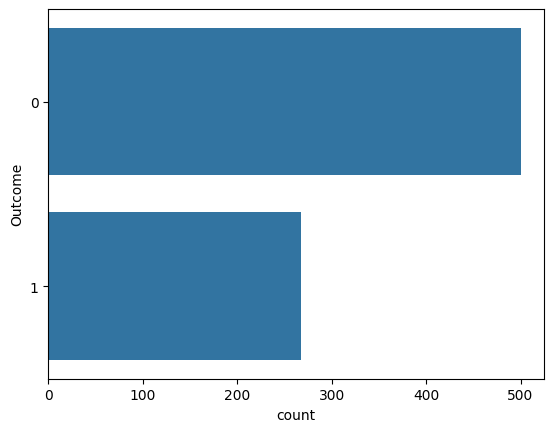

In [7]:
sns.countplot(data = df, y = 'Outcome')

Text(0.5, 0.98, 'Histogram of Pima Indian Diabetes Datasets Features')

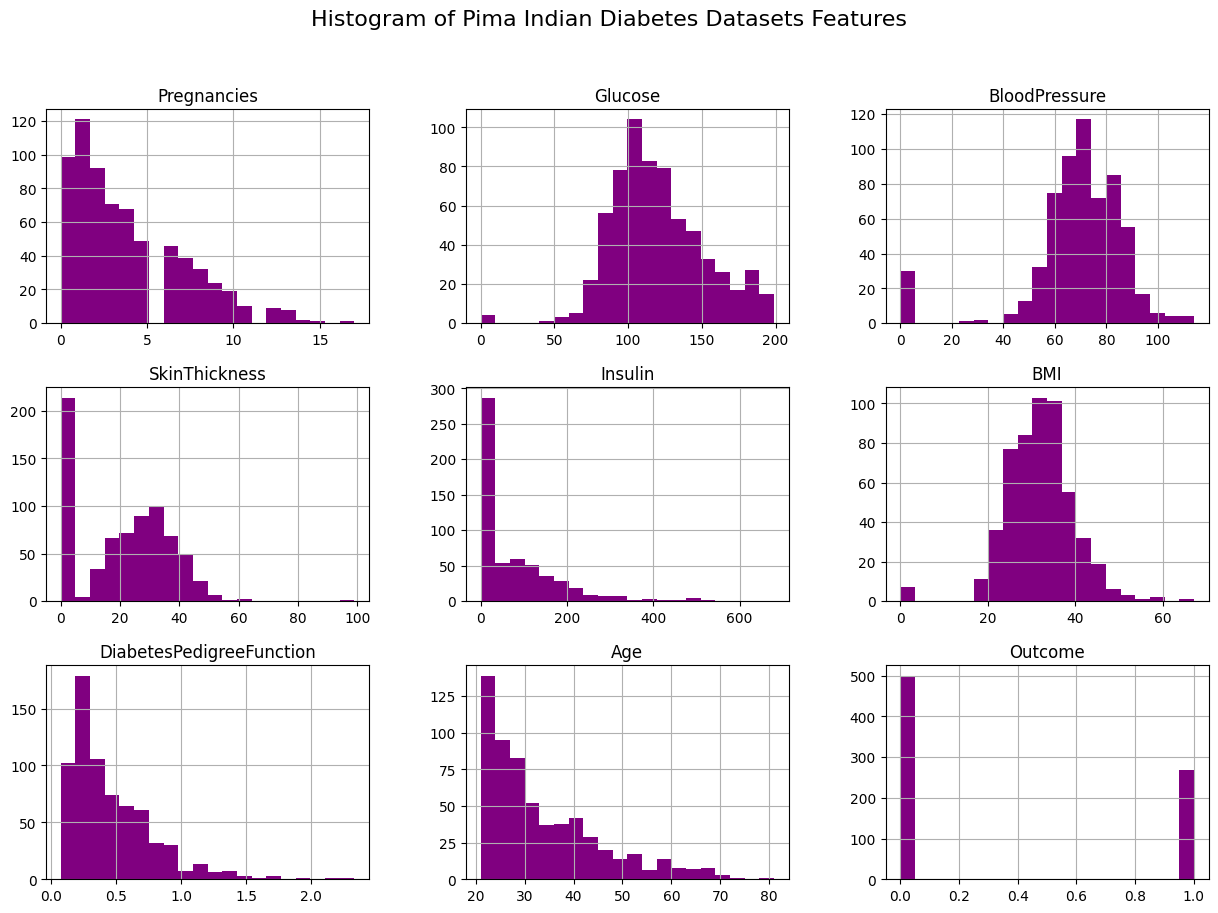

In [8]:
df.hist(bins = 20, figsize = (15, 10), layout = (3, 3),
         color = 'purple');
plt.suptitle('Histogram of Pima Indian Diabetes Datasets Features', fontsize = 16)

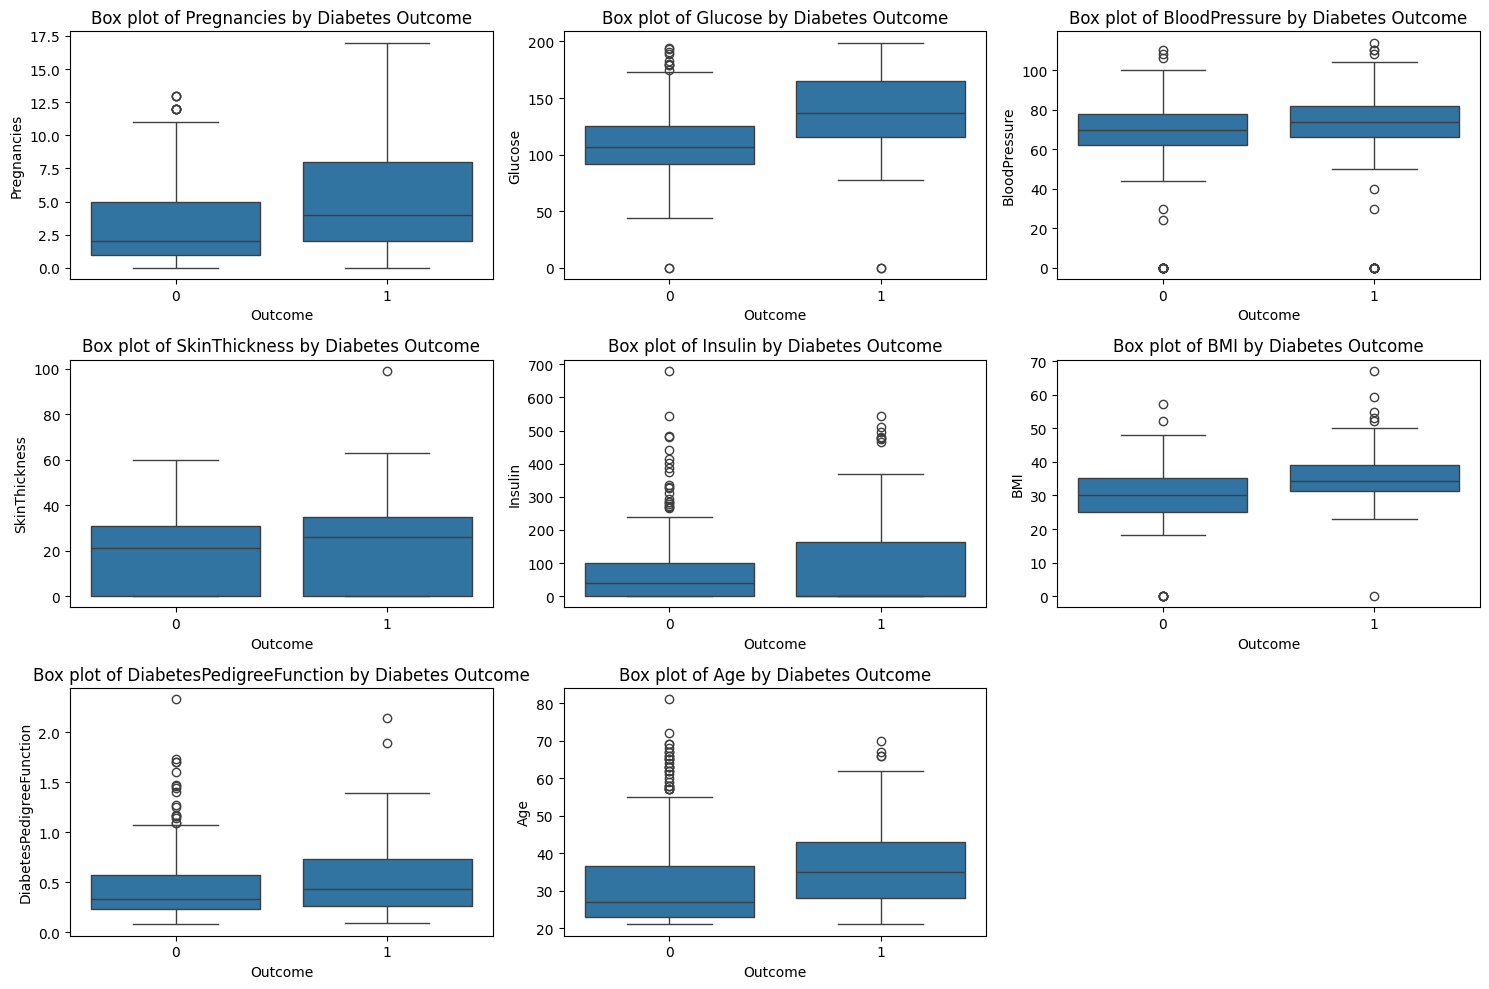

In [9]:
def plot_boxplots(data):
    plt.figure(figsize = (15, 10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i+1)
        sns.boxplot(x = 'Outcome', y = column, data = data)
        plt.title(f'Box plot of {column} by Diabetes Outcome')
    plt.tight_layout()
    plt.show()

plot_boxplots(df)

<Axes: >

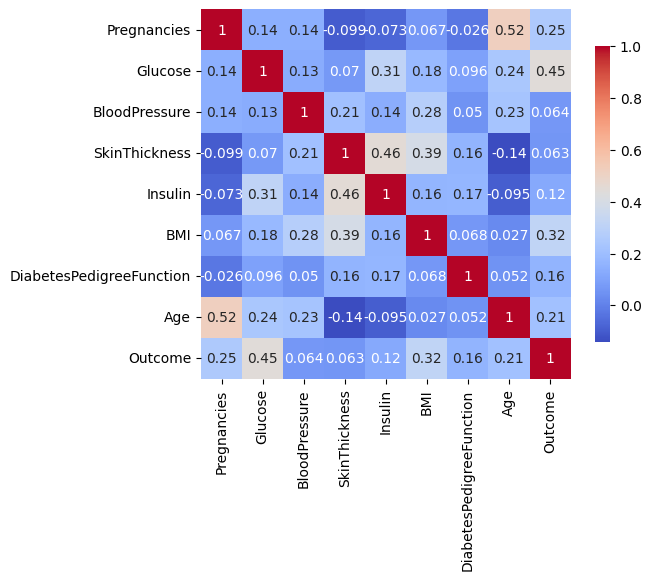

In [10]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm',
            square = True, cbar_kws = {"shrink" : .8})

In [ ]:
df_text = pd.read_excel('foodreviews.xlsx')
df_text.head(3)

In [ ]:
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 400,
                          background_color = 'blue',
                          colormap = 'pink').generate(text)
    
    plt.figure(figsize = (10, 5))
    plt.imshow(Wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews', fontsize = 16)
    plt.show()
plot_wordcloud(text)

In [16]:
imputer = KNNImputer(n_neighbors = 5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.columns
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [ ]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
sns.countplot(data=x_resampled, y=y_resampled)

In [ ]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

In [24]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,165.2,72.0,35.0,0.0,33.54,0.6270,36.0,1.0
1,1.0,85.0,66.0,29.0,0.0,34.54,0.3510,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.6720,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.10,0.1670,21.0,0.0
4,0.0,147.8,40.0,35.0,168.0,43.10,0.5078,33.0,1.0
5,5.0,116.0,74.0,0.0,15.4,25.60,0.2010,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,32.04,0.2480,26.0,1.0
7,10.0,115.0,48.4,0.0,0.0,35.30,0.2082,29.0,0.0
8,4.4,197.0,70.0,45.0,543.0,30.50,0.1580,53.0,1.0
9,8.0,125.0,96.0,0.0,0.0,0.00,0.2320,54.0,1.0
